In [ ]:
#================================= Model sur une dataset scrapée ================================

In [1]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("/kaggle/input/newnettoy16052025/Dataset_CV_nettoye_normalise.csv")


In [3]:
def nettoyer_texte(texte):
    texte = str(texte).lower()
    texte = re.sub(r"\d+", "", texte)
    texte = texte.translate(str.maketrans('', '', string.punctuation))
    texte = re.sub(r"\s+", " ", texte)
    return texte.strip()

df['clean_cv'] = df['cv_etendu_normalise'].apply(nettoyer_texte)


In [4]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['metier'])


In [5]:
from sklearn.model_selection import train_test_split

# Séparer X et y
X = df["clean_cv"]
y = df["label"]

# 1. Split train (70%) + temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 2. Split temp en validation (15%) + test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


In [6]:
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
}



===== Modèle : Naive Bayes =====
                                   precision    recall  f1-score   support

Administrateur de base de données       1.00      1.00      1.00         8
                         Big data       1.00      1.00      1.00         8
                  Cloud computing       1.00      1.00      1.00         8
                     Data analyst       1.00      1.00      1.00         9
                   Data scientist       1.00      1.00      1.00         8
         Développeur Informatique       1.00      1.00      1.00         8
              Développeur Mobiles       1.00      1.00      1.00         8
           Formateur Informatique       1.00      1.00      1.00         8
  Ingénieur en systèmes embarqués       1.00      1.00      1.00         8
            Sécurité Informatique       1.00      1.00      1.00         8
             Testeur Informatique       1.00      1.00      1.00         8

                         accuracy                           1.00

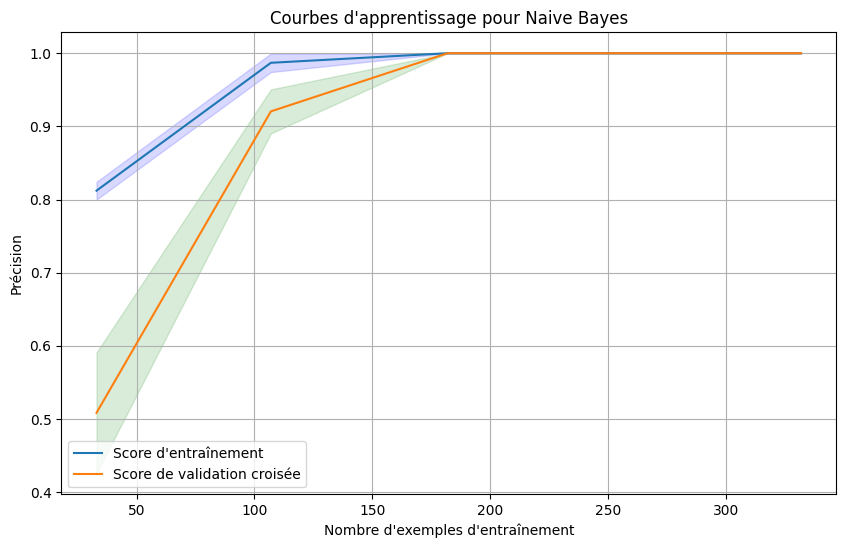


===== Modèle : Linear SVM =====
                                   precision    recall  f1-score   support

Administrateur de base de données       1.00      1.00      1.00         8
                         Big data       1.00      1.00      1.00         8
                  Cloud computing       1.00      1.00      1.00         8
                     Data analyst       1.00      1.00      1.00         9
                   Data scientist       1.00      1.00      1.00         8
         Développeur Informatique       1.00      1.00      1.00         8
              Développeur Mobiles       1.00      1.00      1.00         8
           Formateur Informatique       1.00      1.00      1.00         8
  Ingénieur en systèmes embarqués       1.00      1.00      1.00         8
            Sécurité Informatique       1.00      1.00      1.00         8
             Testeur Informatique       1.00      1.00      1.00         8

                         accuracy                           1.00 

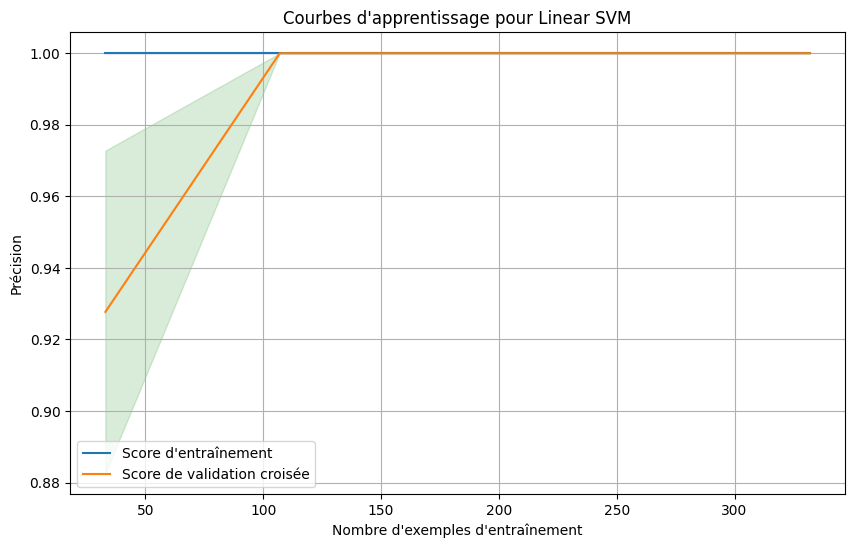


===== Modèle : Random Forest =====
                                   precision    recall  f1-score   support

Administrateur de base de données       1.00      1.00      1.00         8
                         Big data       1.00      1.00      1.00         8
                  Cloud computing       1.00      1.00      1.00         8
                     Data analyst       1.00      1.00      1.00         9
                   Data scientist       1.00      1.00      1.00         8
         Développeur Informatique       1.00      1.00      1.00         8
              Développeur Mobiles       1.00      1.00      1.00         8
           Formateur Informatique       1.00      1.00      1.00         8
  Ingénieur en systèmes embarqués       1.00      1.00      1.00         8
            Sécurité Informatique       1.00      1.00      1.00         8
             Testeur Informatique       1.00      1.00      1.00         8

                         accuracy                           1.

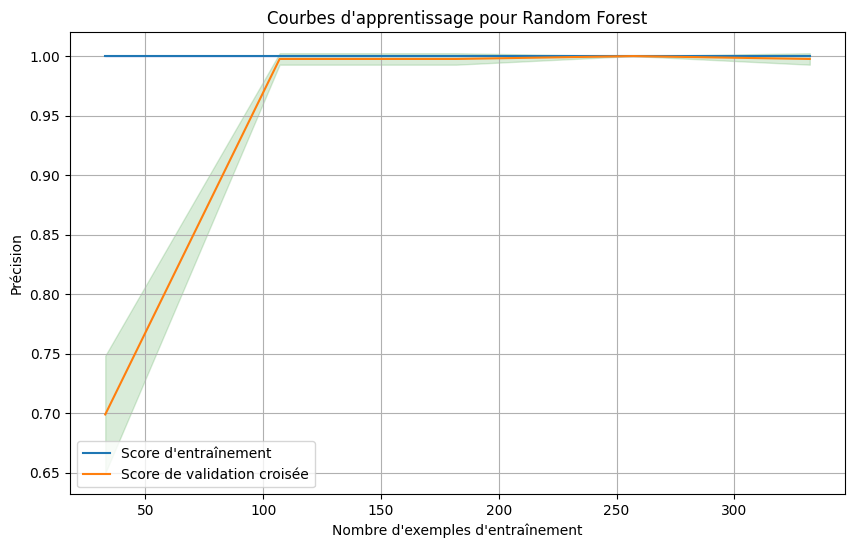


===== Modèle : Logistic Regression =====
                                   precision    recall  f1-score   support

Administrateur de base de données       1.00      1.00      1.00         8
                         Big data       1.00      1.00      1.00         8
                  Cloud computing       1.00      1.00      1.00         8
                     Data analyst       1.00      1.00      1.00         9
                   Data scientist       1.00      1.00      1.00         8
         Développeur Informatique       1.00      1.00      1.00         8
              Développeur Mobiles       1.00      1.00      1.00         8
           Formateur Informatique       1.00      1.00      1.00         8
  Ingénieur en systèmes embarqués       1.00      1.00      1.00         8
            Sécurité Informatique       1.00      1.00      1.00         8
             Testeur Informatique       1.00      1.00      1.00         8

                         accuracy                       

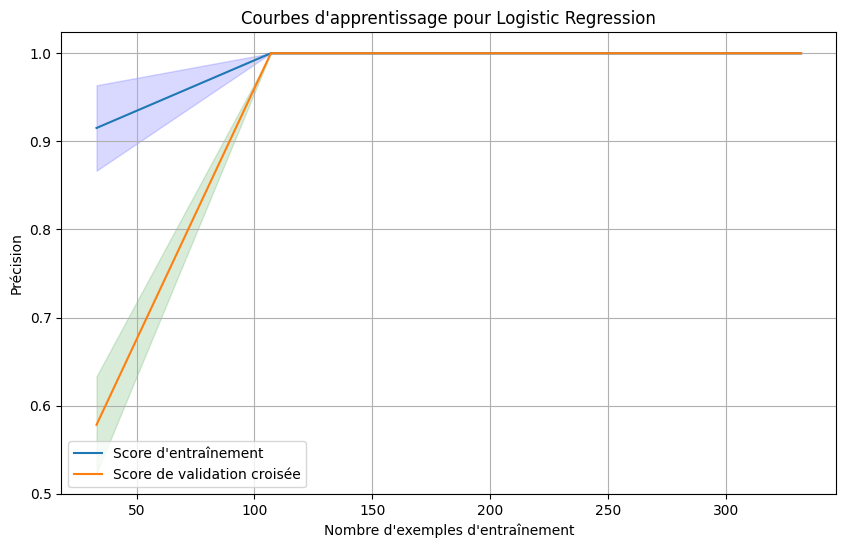

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Boucle d’entraînement + courbes
for name, model in models.items():
    print(f"\n===== Modèle : {name} =====")
    
    # Entraînement
    model.fit(X_train_tfidf, y_train)
    
    # Évaluation sur le set de validation
    y_pred = model.predict(X_val_tfidf)
    
    # Rapport
    print(classification_report(
        y_val,
        y_pred,
        target_names=label_encoder.classes_
    ))
    
    # Courbes d’apprentissage
    train_sizes, train_scores, validation_scores = learning_curve(
        model,
        X_train_tfidf,
        y_train,
        train_sizes=np.linspace(0.1, 1.0, 5),
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(validation_scores, axis=1)
    val_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Score d'entraînement")
    plt.plot(train_sizes, val_mean, label="Score de validation croisée")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color="green")
    plt.title(f"Courbes d'apprentissage pour {name}")
    plt.xlabel("Nombre d'exemples d'entraînement")
    plt.ylabel("Précision")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
# On mémorise le dernier model qui est Logistic Regression 


In [10]:
# Sauvegarde du model et vectoriser et le label encoder ( pour variable cible ) 

import joblib

joblib.dump({
    "model": model,
    "vectorizer": vectorizer,
    "label_encoder": label_encoder
}, "cv_classifier_bundle.joblib")



['cv_classifier_bundle.joblib']

In [ ]:
======================================================= test ======================================

In [12]:
bundle = joblib.load("/kaggle/input/modelv1/scikitlearn/default/1/cv_classifier_bundle (3).joblib")
model = bundle["model"]
vectorizer = bundle["vectorizer"]
label_encoder = bundle["label_encoder"]


In [13]:
import re
import string

def nettoyer_texte(texte):
    texte = texte.lower()
    texte = re.sub(r"\d+", "", texte)
    texte = texte.translate(str.maketrans("", "", string.punctuation))
    texte = re.sub(r"\s+", " ", texte)
    return texte.strip()


In [15]:
# Exemple : CV externe (à remplacer par ton vrai texte)
cv_texte = """
 Formations
2024-2025 : Master MIAGE en Intelligence Artificielle (IA2), Université Côte d’Azur, Nice, France.

2022-2025 : Cycle ingénieur en Informatique et Réseaux (MIAGE), EMSI Rabat.

2020-2022 : Technicien Spécialisé en Développement Informatique, ISTA Hay Riad, Rabat — Mention très bien.

2019-2020 : Baccalauréat Sciences Physiques, Lycée Abi Darr AL Ghaffari, Rabat — Mention assez bien.

💼 Expériences
Fév – Avr 2024 : Stage de perfectionnement – ISICOD, Rabat
➤ Développement d'une application intranet RH (PHP & MySQL).

Sept – Août 2023 : Freelance – Centre Forbinet Privé, Salé
➤ Application d’apprentissage de la langue allemande (PHP & MySQL).

Fév 2022 : Stage d’initiation – Trésorerie Générale du Royaume, Rabat
➤ Application multilingue de gestion budgétaire (PHP & MySQL).

Stage en cours : Forcinet, Rabat
➤ Application desktop pour gestion des stages (ASP.NET & MS SQL Server).

🛠️ Compétences
Techniques :

Langages : Java, J2EE, Python, C/C++, C#, PHP, JavaScript.

Frameworks : Spring Boot, Django, ASP.NET, React, Angular.

IA & Data : Intelligence Artificielle, Machine Learning, Deep Learning.

Bases de données : SQL, PL/SQL, Oracle DBA, MS SQL Server.

Modélisation : UML, Merise.

Outils : Git/GitHub, JIRA, Trello, Miro, MS Project, Open Talend Studio, Unix.

Managériales :

Gestion de projet

Marketing des NTIC

Entrepreneuriat

Comptabilité analytique

Analyse financière

Management & Marketing

💡 Qualités
Esprit d’équipe

Dynamique

Serviable

Créatif

🚗 Permis
Permis B

🌍 Langues
Arabe : Maternelle

Français : Courant

Anglais : Intermédiaire
"""

# Prétraitement
cv_nettoye = nettoyer_texte(cv_texte)

# Vectorisation
cv_vect = vectorizer.transform([cv_nettoye])

# Prédiction
prediction = model.predict(cv_vect)
metier_prevu = label_encoder.inverse_transform(prediction)[0]

print("🔍 Métier prédit :", metier_prevu)


# 🔎 Probabilités de toutes les classes
if hasattr(model, "predict_proba"):
    probas = model.predict_proba(cv_vect)[0]
    classes = label_encoder.classes_
    proba_par_classe = dict(zip(classes, probas))
    proba_triee = sorted(proba_par_classe.items(), key=lambda x: x[1], reverse=True)

    print("\n📊 Probabilités par classe :")
    for classe, score in proba_triee:
        print(f"{classe:35s} : {score:.3f}")
else:
    print("\n⚠️ Le modèle ne supporte pas predict_proba (ex: LinearSVC).")

🔍 Métier prédit : Administrateur de base de données

📊 Probabilités par classe :
Administrateur de base de données   : 0.144
Développeur Informatique            : 0.140
Data scientist                      : 0.106
Data analyst                        : 0.092
Big data                            : 0.083
Ingénieur en systèmes embarqués     : 0.079
Cloud computing                     : 0.076
Formateur Informatique              : 0.074
Développeur Mobiles                 : 0.073
Testeur Informatique                : 0.070
Sécurité Informatique               : 0.063
